Copyright statement?

# A New 'Transition'
Welcome back! At this point in the course you are all likley aces at numerical analysis, expecially after 5 modules ranging from Diffusion, to Convection, to Conduction, in 1 or 2D, with various Neumann and Dirichlet Boundary conditions! 

But now it's time for a new "phase". In this lesson we begin looking at what happens when your nice rigid boundary conditions decide to start moving on you, essentially creating a moving boundary interface! 

A moving boundary interface is represented by numerous physical behaviors in real-world applications, from the polar ice caps melting, to the phase transformations of metal alloys, to the varying oxygen content of  muscles near a clotted bloodvessel [2].

![Image](Examples1.jpg)
 #### Real World Applications of a Moving Boundary Interface

### The Stefan Problem
This new type of problem is known as the "Stefan Problem" as it was first studied by Slovene physicist Jozef Stefan around 1890 [3]. Though his focus was primarily on the analysis of ice formations, nowadays his name is synonymous with the particular type of boundary value problem for PDEs where the boundary can move with time.  Since the classic Stefan problem concentrated on the temperature distribution of a homogeneous material undergoing a phase transition, one of the most commonly studied Stefan problems today is the melting of Ice to Water!

![Image](Picture2.jpg)
 #### Jozef Stefan pioneered work into phase transitions of materials (ie Ice)

## A Review: 1D Heat Conduction

Recall from both Modules 2 and 4 we took a loook at the Diffusion equation in 1D:

$$\begin{equation}
\frac{\partial U}{\partial t} = \alpha \frac{\partial^2U}{\partial x^2}
\end{equation}$$

Where we have the temperature distribution $U(x,t)$ and the thermal diffusivity $\alpha$. While before we looked at the conduction of heat through a graphite rod of length 1 meter, in this scenario we will analyze heat conduction though a 1D rod of ice.  Let's first list some basic coefficients associated with the simplified Stefan Problem:


##### Thermal Properties of Ice at ~$0^{\circ}C$:
Thermal Conductivity: $k = 2.22 \frac{W}{mK}$

Density: $\rho \approx 1000 \frac{kg}{m^3}$

Specific Heat: $c_{p}= 2.05x10^{-3} \frac{J}{kgK}$

and lastly, Thermal Diffusivity: $\alpha = \frac{k_{ice}}{\rho_{ice}c_{p_{ice}}} = 1.083x10^{-6} \frac{m^2}{sec}$

Melting Temperature of Ice is: $T_{melt}=0^{\circ}C$


Okay! With that out of the way, let's look at the temperature distribution across the a rod of ice of length 1m with some basic initial and boundary conditions. For this first scenario, we will not take into account phase transition if temperatures hit $T_{melt}$, and will therefore assume a static boundary condition.

##### Problem Setup
Governing Equation: $$\begin{equation}
\frac{\partial U}{\partial t} = \alpha \frac{\partial^2U}{\partial x^2}
\end{equation}$$

Boundary Conditions: 

LHS: $\frac{\partial U}{\partial x} = -e^{\beta t}$,   @x=0, t>0, time-dependant (increasing) heat flux in 

RHS: $\frac{\partial U}{\partial x} = 0$,  @x=L, t>0,   Insulated end, no heat flux in/out. 


Initial Conditions:

$U(x,t) = -10^{\circ}C$, for 0<x<L, t=0

Lets start coding!!


In [632]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']= 'serif'
rcParams['font.size']=16
from IPython.display import Image

Now let's define a function to run the governing equations using the Forward-Time/Central-Difference Method discretization

In [633]:
def FTCS(U, nt, dt, dx, alpha, beta):
    
    for n in range(nt):
        
        Un=U.copy()
        U[1:-1] = Un[1:-1] + alpha*(dt/dx**2)*(Un[2:]-2*Un[1:-1]+Un[0:-2])
        
        #Boundary Conditions 
        
        U[-1]=U[-2]                  #RHS Insulated BC
        
        t=n*dt                                    #Increasing time = n*timestep(dt)
        U[0]=numpy.exp(beta*t)     #LHS Time dependant heat input in, BC
        
    return U

In [634]:
#Basic Parameters and Initialization

# Temperature scale: Celsius 
# Length scale: meters
# Mass scale: kg
# Time scale: seconds
# Energy scale: Joules
# Power scale: Watts

L = 1                                                         # Length of my ice rod
nt = 40000                                                  # Number of timesteps
nx = 51                                                     # Number of gird space steps
alpha = 1.083e-6                                   # Thermal Diffusivity
dx = L/(nx-1)                                           # grid spacing in "x" 
Ui = numpy.ones(nx)*(-10)                    # initialized Temperature array
beta = 0.001                                               #Growth Factor of my Temperature input

sigma = 1/2                                             # Stability*
dt=0.1                                                      # Timestep chosen to be 0.1 seconds*

A word on Stability:

Recall from module 2 we had the Courant-Friedrichs-Lewy (CFL) Stability condition for the FTCS Diffusion equation in the form:
$$\sigma = \alpha \frac{\Delta t}{\Delta x^{2}} \leq \frac{1}{2} $$

re-arranging to determine the upper limit for a time-step (dt) we have:
$$\Delta t \leq \frac{\sigma \Delta x^{2}}{\alpha} \approx 923 seconds$$

As you can see, chosing a time-step (dt) equal to $0.1$ seconds, we more than satisfy this CFL Stability condition.


Initial ice rod temperature


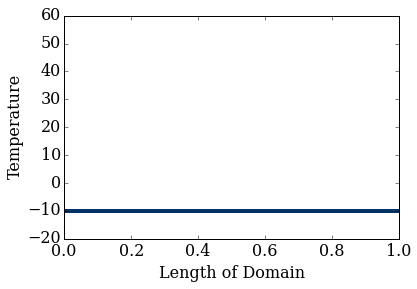

In [635]:
x = numpy.linspace(0, 1, nx)
print('Initial ice rod temperature')
pyplot.plot(x, Ui, color = '#003366', ls = '-', lw =4)
pyplot.ylim(-20, 60)
pyplot.xlabel('Length of Domain')
pyplot.ylabel('Temperature')


Total elapsed time is  4000.0 seconds, or 66.66666666666667 minutes


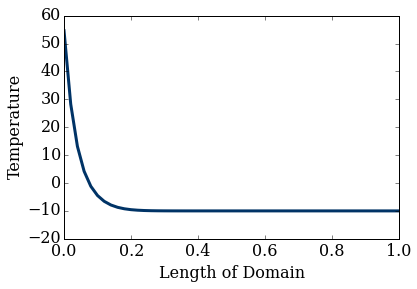

In [636]:
U = FTCS(Ui.copy(), nt, dt, dx, alpha, beta)
print('Total elapsed time is ', nt*dt, 'seconds, or', nt*dt/60, 'minutes' )
pyplot.plot(x, U, color = '#003366', ls = '-', lw =3)
pyplot.ylim(-20, 60)
pyplot.xlim(0, 1)
pyplot.xlabel('Length of Domain')
pyplot.ylabel('Temperature')

The above figure shows us the temperature distribution of the ice rod at a point in time approximately 1 hour into applying our heat source. Now this would be all well and good if ice didn't melt (and therefore change phase) at zero degrees. But it does!! 

Let's build a rudimentary function to see what portion of the rod should be water by now, and which part should still be ice:

In [637]:
def Phase_graph(U, x, nx):
    phase=numpy.ones(nx)*(-100)
    for n in range(nx):
        if U[n]>0:
            phase[n]=100
    return phase    

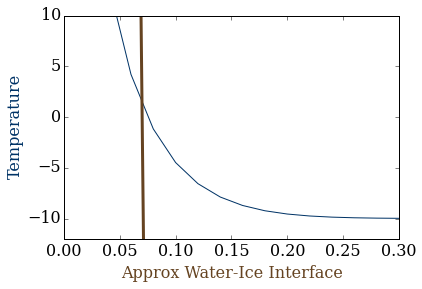

In [638]:
pyplot.plot(x, U, color = '#003366')
pyplot.ylabel('Temperature', color ='#003366')
Phase1=numpy.ones(nx)
Phase=Phase_graph(U, x, nx)
pyplot.plot(x, Phase, color = '#654321', ls = '-', lw =3)
pyplot.ylim(-12, 10)
pyplot.xlim(0, 0.3)
pyplot.xlabel('Approx Water-Ice Interface', color = '#654321')

As you can see, the ice SHOULD have melted about 0.07 meters  (or 2.75 inches) into our rod. In reality, our boundary interface has moved from x=0 to the right as time elapsed.  Not only should our temperature distribution profile change due to the differences in properties ($\rho, k, c_{p}$), but also the feedback from the moving boundary condition.

## Solutions to the Dimensionless Stefan problem:
### Analytical Solution:

Before we continue we need to make some simplfications:

1) No convection, heat transfer is limited to conduction,

2) Pressure is constant,

3) Density does not change between the solid and liquid phase (Ice/Water), ie $\rho_{ice}=\rho_{water}\approx 1000 \frac{kg}{m^3}$,

4) The phase change interface at $s(t)$ has no thickness 


Looking closer at the problem at hand, we see that our temperature distribution must conform to the below figure:

![Image](Picture3.jpg)
 #### Phase Change Domain

  As you can see, our temperature distribution experiences a discontinuity at our solid-liquid interface at x=s(t). Furthermore, this boundary moves to the right as time elapses. If we wish to analyze the distribution in one region or the other, we need to take into account a growing or shrinking domain, and therefore, the boundary of the domain has to be found as part of the solution [2].  In the Melting Problem depicted above, a moving interface separates the liquid and solid phases. The displacement of the boundary interface (denoted as $\dot{s}$) is driven by the heat transport through it [2]. The relationship  between the moving interface, s(t), and the temperature distribution through it was developed by and is known as the Stefan Condition (or Stefan Equation) and takes the form of the following boundary conditions:

when x =s(t),
######  [1, 3, 2]
$$\dot{s} = \frac{ds}{dt} = -\frac{\partial U}{\partial x}$$  
$$U=0$$

There are many solution methods for the Stefan problem, for this lesson we will focus on finding the temperature distribution in the liquid region only (ie 0<x<s(t)). Critical parameters to track are both temperature, U(x,t), and the position of the interface, s(t). Let's first solve this problem analytically:

To make our lives easier we want a simplified version of the Stefan Problem, In his paper, Crowley [4] presented that both Oleinik and Jerome demonstrated how using an appropriate dimensionless model, and appropriate boundary conditions, and initial conditions, not only could one determine a general solution for the diffusion equation with the Stefan condition, but also that an explicit finite difference scheme converges to this solution [4]. For our dimensionless model we will set $\alpha=1, \beta=1$ to get the following governing equations, and boundary conditions:

#### Dimensionless Stefan Problem Equations

$$\frac{\partial U}{\partial t} = \frac{\partial^{2} U}{\partial x^{2}}$$

$$s(t)$$

(1) $\frac{\partial U(x=0, t)}{\partial x} = -e^{t}$, LHS BC (Heat input into the system)

(2) $\frac{\partial U(x=s(t), t)}{\partial x} = -\frac{d s(t)}{d t}$, RHS BC, Stefan Condition

(3) $U(x=s(t), t) = T_{melt}=0$, By definition of the Melting interface

(4) s(t=0)=0, initial condition

These equations set up the new below figure:
![Image](Picture4.jpg)

Because we want to be able to judge the accuracy of our numerical analysis (and thanks to Crowley, Oleinik, and Jerome!) we next find the general solution of this problem by means of Separation of Variables:

SOV: $U(x,t)=X(x)T(t)$, gives us a general solution of the form:

$$U(x,t) = c_{1}e^{c_{2}^{2}t-c_{2}x} +c_{3}$$

from BC(1) we get $c_{2}=1, c_{1}=1, yielding: U(x,t) = e^{t-x} +c_{3}$

from BC(2) we get:  $\dot{s}=\frac{\partial s(t)}{\partial t} = -\frac{\partial U(x=s(t), t)}{\partial x}\rightarrow -e^{t-s(t)}= \frac{ds(t)}{d t}$, this yields that the only solution fo s(t) is: $$s(t)=t$$

from BC(3) we get: $U(s(t),t) + c_{3} = 0, \rightarrow e^{t-t} +c_{3}=0, \rightarrow c_{3}=-1$, 

Finally we get an exact solution for the temperature distribution:

$$U(x,t) = e^{t-x}-1$$,    $$s(t) = t$$

and this satisfies the initial condition IC(4) that s(t=0)=0!!

And now you see why we chose the heat input function to be a time-dependant exponential, if you don't believe me that the analytical solution would be much nastier if you had chosesn say, a constant heat input, give SOV a try and let me know how it goes! Let's graph this solution and see if it makes sense.

In [639]:
def Exact_Stefan( nt, dt, x):
    U=numpy.ones(nx)
    for n in range(nt):
        U = numpy.exp(n*dt-x)-1
    return U

Analytically, this is our temperature profile after: 1.0 seconds
The temperature at our LHS boundary is: 1.71285069774 degrees


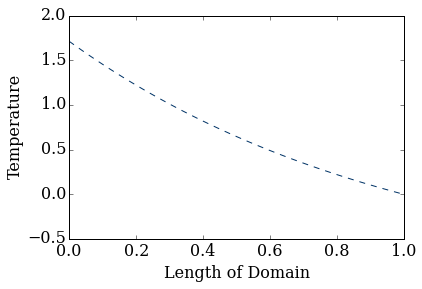

In [640]:
dt_A=0.002
nt_A=500
ExactS=Exact_Stefan(nt_A, dt_A, x)
Max_tempA=max(ExactS)

pyplot.plot(x, ExactS, color = '#003366', ls = '--', lw =1)
pyplot.xlabel('Length of Domain')
pyplot.ylabel('Temperature')
print('Analytically, this is our temperature profile after:', nt_A*dt_A,'seconds')
print('The temperature at our LHS boundary is:', Max_tempA, 'degrees')

Does the solution look right? YES! Remember, this temperature profile is "Dimensionless" so we can't compare it to our previous example (not only is the diffusivity constant vastly different, but we are looking 1 second into the diffusion vs 1 hr!). Also it accounts ONLY for the temperature distribution in the liquid, assuming an ever increasing domain due to an ever expanding RHS boundary. Not only did we expect temperature to be highest at the input side, but our moving boundary interface, s(t), moves to the right with time and always hits our melting temperature ($0^{\circ} c$) at x=1, just as one would expect.

### Numerical Solution: The Variable Grid Method

What makes this problem unique is that we must now track the time-dependant moving boundary. Now, for previous numerical analysis in a 1D domain, you had a constant number of spacial intervals nx (or N) between your two boundaries x=0, and x=L. Thus your spatial grid steps dx were constant and defined as $dx = L/(nx-1)$. But now you have one fixed bounary and one moving boundary, and your domain increases as time passes. [1] 

![Image](Fixed Grid.jpg)





One of the key tenements of the Variable Grid Method for solving the Stefan probem is that you keep the NUMBER of grid points (nx) fixed, thus your grid SIZE (dx) will increase as the domain increases. Your grid size now varies dependant on the location of the interaface front, dx = s(t)/N.

$$dx = \frac{L}{N-1}     \longrightarrow      dx = \frac{s(t)}{N}$$

![Image](Variable Grid 1.jpg)

Now, while one might be tempted to view the figure above as the new "Variable Grid" stencil, one must remember that the "Y"-axis is time, and therefore as you move up you are moving forward in time, therefore a more accurate depiction of the FTCS method in stencil form for the Variable Grid method would be: 

![Image](Variable Grid 2.jpg)

and so it becomes clear - that the our spacial step ($dx$) will be depentant on our time step ($m$)!!

####  Deriviation of the new Governing Equation

   Now lets set up the new governing equations to be discretized for our code. We know that the 1D Diffusion equation must be valid for all points on our spatial grid so we can re-write the LHS of equation:
   $$\frac{\partial U}{\partial t} = \frac{\partial^{2} U}{\partial x^{2}}$$
   to be $$ \frac{\partial U_{i}}{\partial t} = \frac{\partial U_{@t}}{\partial x}\frac{dx_{i}}{dt} + \frac{\partial U_{@x}}{\partial t}$$
   
  we can use the expression: $$\frac{dx_{i}}{dt} = \frac{x_{i}}{s(t)}\frac{ds}{dt}$$   to track the movement of the node $i$.
  
  Substituting these into the diffusion equation (and droping the i,t, and x indices since they are constant) we obtain a new governing equation for diffusion: 
  
  $$\frac{\partial U}{\partial t} = \frac{x_{i}}{s}\frac{ds}{dt}\frac{\partial U}{\partial x} + \frac{\partial^{2}U}{\partial x^{2}}$$ 
  
  This is subject to the boundary and initial conditions (BC1-BC3, IC4) as stated for the 1D dimensionles Stefan problem above.

#### Discretization 

and now we seek to discretize the new governing equations. For this code we will implement an explicit, FTCS scheme, with parameters taking a Taylor expansion centered about the node ($x_{i}^{m}$), and time ($t_{m}$) just like before. In the above equations we discritized the time derivatives of U using forward time, and the spatial derivitaives using centered space. We re-write ds/dt as $\dot{s}$ and leave it a variable for now. (EXERCISE: See if you can discretize this equation form memory!!) 


Taylor Expand and Discretize: (moving from left to right)

$\frac{\partial U}{\partial t} \longrightarrow  \frac{U_{i}^{m+1}-U_{i}^{m}}{\Delta t}$,

$\frac{x_{i}}{s}  \longrightarrow  \frac{x_{i}^{m}}{s_{m}}$,

$\frac{ds}{dt} \longrightarrow \dot{s_{m}}$,

$\frac{\partial U }{\partial x} \longrightarrow \frac{U_{i+1}^{m}-U_{i-1}^{m}}{2\Delta x^{m}}$,

$\frac{\partial^{2}U}{\partial x^{2}} \longrightarrow \frac{U_{i+1}^{m}-2U_{i}^{m}+U_{i-1}^{m}}{(\Delta x^{m})^{2}}$

And now we substitute, rearrange and solve for $U_{i}^{m+1}$ to get:

$U_{i}^{m+1}=U_{i}^{m}+\frac{\Delta t x_{i}^{m} \dot{s_{m}}}{2 \Delta x^{m}s_{m}}(U_{i+1}^{m}-U_{i-1}^{m}) + \frac{\Delta t}{(\Delta x^{m})^{2}}(U_{i+1}^{m}-2U_{i}^{m}+U_{i-1}^{m})$



Great!! We're almost ready to start coding, but before we begin, do you notice a problem with this expression? What about if i=0? Plug it in and you will see that we have expressions of the form $U_{-1}^{m}$ in both right hand terms, but that can't be right, looking at our stencil we see that $i=-1$ is off our grid! This is where the boundary conditions come in!

Generate discretization expressions for the boundary conditions at x=0 (LHS) and x=s(t) (RHS). For the RHS and the temperature gradient across the moving boundary interface we will use a  three-term backward difference scheme:

LHS:  $\frac{\partial U(x=0, t)}{\partial x} = -e^{t} \longrightarrow    \frac{U_{i+1}^{m}(0,t)-U_{i-1}^{m}(0,t)}{2\Delta x^{m}} = e^{t_{m}}$, and

RHS: $\frac{\partial U(x=s(t), t)}{\partial x} = -\frac{d s(t)}{d t} \longrightarrow \frac{\partial U(x=s(t),t)}{\partial x} = \frac{3U_{N}^{m}-4U_{N-1}^{m}+U_{N-2}^{m}}{2\Delta x^{m}}  $

from our LHS boundary conditio expression, if we set $i=0$ and solve for $U_{-1}^{m}$ we get: $$U_{-1}^{m}=U_{1}^{m} + 2\Delta x^{m} e^{t_{m}}$$

We can now combine this expression and substitute into the governing equation to get expressions for diffusion at  $i=0, i=1$ to $(N-1)$, and $i=N$:


$U_{i}^{m+1}=(1-2\frac{\Delta t}{(\Delta x^{m})^{2}})U_{i}^{m} + 2\frac{\Delta t}{(\Delta x^{m})^{2}}U_{i+1}^{m} + (2\frac{\Delta t}{\Delta x^{m}}-\frac{\Delta t x_{i}^{m}\dot{s_{m}}}{s_{m}})e^{t_{m}}$


$U_{i}^{m+1}=U_{i}^{m}+\frac{\Delta t x_{i}^{m} \dot{s_{m}}}{2 \Delta x^{m}s_{m}}(U_{i+1}^{m}-U_{i-1}^{m}) + \frac{\Delta t}{(\Delta x^{m})^{2}}(U_{i+1}^{m}-2U_{i}^{m}+U_{i-1}^{m})$

$U_{i}^{m}=0$, $i=N$

Phew!! Now that is one impressive looking set of discretization expressions. But, sorry, we aren't done yet..... In the above expressions what are we supposed to do about $\dot{s_{m}}$ and $s_{m}$? 

Well luckily, that is where the Stefan condition comes in, remember:

$\dot{s_{m}} = \frac{ds}{dt}= -\frac{\partial U_{@x=s}}{\partial x} = -\frac{3U_{N}^{m}-4U_{N-1}^{m}+U_{N-2}^{m}}{2\Delta x^{m}} $, and as for $s_{m}$ that is just a Heat Balance equation:

$s_{m+1} = s_{m}+\dot{s_{m}}\Delta t = s_{m} - \frac{\Delta t}{2\Delta x^{m}}(3U_{N}^{m}-4U_{N-1}^{m}+U_{N-2}^{m})$, where $s_{0}=0$

To make our lives easier, instead of inserting these expressions for $\dot{s_{m}}$ and $s_{m}$ into our governing equations, lets keep them as coupled expressions and define them as functions to be called during the time loops and calculated at every grid point $i$.

lastly, lets not forget that the updated interface location $s_{m+1}$ and grid size $\Delta x^{m}$ are calculated at every timestep $m$, and have the relationship: 

$$\Delta x^{m+1} = \frac{s_{m+1}}{N}$$

Don't worry, we are almost ready to code, I promise! There is just one more expression we need to consider, and that relates to Stability! Following the calculations of Caldwell and Savovic [5], for now, we will use something simple in order to limit the size of the timestep ($\Delta t$), that is: $$\frac{\Delta t}{(\Delta x^{m})^{2}} \leq 1$$, or

$$\Delta t \leq (\Delta x^{m})^{2}$$

## Let's Code!!

To summarize our governing equations we need to code these 7 coupled equations:

(A) $u_{i}^{m+1}=(1-2\frac{\Delta t}{(\Delta x^{m})^{2}})u_{i}^{m} + 2\frac{\Delta t}{(\Delta x^{m})^{2}}u_{i+1}^{m} + (2\frac{\Delta t}{\Delta x^{m}}-\frac{\Delta t x_{i}^{m}\dot{s_{m}}}{s_{m}})e^{t_{m}}$


(B) $u_{i}^{m+1}=u_{i}^{m}+\frac{\Delta t x_{i}^{m} \dot{s_{m}}}{2 \Delta x^{m}s_{m}}(u_{i+1}^{m}-u_{i-1}^{m}) + \frac{\Delta t}{(\Delta x^{m})^{2}}(u_{i+1}^{m}-2u_{i}^{m}+u_{i-1}^{m})$

(C) $u_{i}^{m}=0$, $i=N$

(D) $\dot{s_{m}} = \frac{ds}{dt}= -\frac{\partial u_{@x=s}}{\partial x} = -\frac{3u_{N}^{m}-4u_{N-1}^{m}+u_{N-2}^{m}}{2\Delta x^{m}} $

(E) $s_{m+1} = s_{m}+\dot{s_{m}}\Delta t = s_{m} - \frac{\Delta t}{2\Delta x^{m}}(3u_{N}^{m}-4u_{N-1}^{m}+u_{N-2}^{m}), s_{0}=0$

(F) $\Delta x^{m+1} = \frac{s_{m+1}}{N}$

(G) $\Delta t \leq (\Delta x^{m})^{2}$

In [641]:
# First we set up some new initial parameters.These values differ from our first example since we are now dealing with 
# a new non-dimensionalized heat equation, and new governing equations. 

#1.0 Numerical Solution Parameters:
dt=2.0e-6        # Size od our Time-step, Set constant, Chosen in accordance with Caldwell and Savovic [5]
nt=500000      # Number of time steps, chosen so that elapsed solution will determing heat diffusion after 
                       # (nt*dt= 1.0 seconds) Just like in our Analytical Solution.
N = 10            #  Number of spatial grid points, Chosen, for now, in accordance with Caldwell and Savovic [5]                       

#2.0 Array Creation and Initial Values:
Uo=0       
U0 = numpy.ones(N)*(Uo)
s0=0.02       
s=numpy.ones(nt)*(s0)
dx=numpy.ones(nt)*(s[1]/N)
sdot=(s[1]-s[0])/dt

s[1]= s[0] - (dt/(2*dx[0]))*(3*U0[N-1]-4*U0[N-2]+U0[N-3])
dx[0]=(s[1]/N)

print('Initial Temperature Array:', U0)
print('Initial Position of the interface (So):', s[0])
print('Initial X_step(dx):', dx[0])
print('Time Step (dt):', dt)
print('Initial speed of our moving interface (Sdot):', sdot)

Initial Temperature Array: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Initial Position of the interface (So): 0.02
Initial X_step(dx): 0.002
Time Step (dt): 2e-06
Initial speed of our moving interface (Sdot): 0.0


In [642]:
# 3.0 Application of the Stefan Problem Governing Equations

for m in range(0, nt-1):
    
   
    for i in range(0, N-1):
        
        #LHS BC (x=0, i=0)
         if(i==0):U0[i]= (1-2*(dt/dx[m]**2))*U0[i]+2*(dt/dx[m]**2)*U0[i+1] + \
                                   (2*(dt/dx[m])-dt*(dx[m]*i)*sdot/s[m])*numpy.exp(m*dt) 
        
        #Governing Equation (B)
         else: U0[i]= U0[i]+ ((dt*(dx[m]*i)*sdot)/(2*dx[m]*s[m]))*(U0[i+1]-U0[i-1]) + \
                                        (dt/(dx[m]**2))*(U0[i+1]-2*U0[i]+U0[i-1]) 
        
        #RHS BC (x=L, L=dx{m*N})
         U0[N-1]=0  
   
    
    
    s[m+1]= s[m] - (dt/(2*dx[m]))*(3*U0[N-1]-4*U0[N-2]+U0[N-3])         #Heat Balance Equation, (E)
    sdot=(s[m+1]-s[m])/dt                                                                                #Updating Speed of Interface                            
    dx[m+1]=(s[m+1]/N)                                                                                 #Updating dx for each time step m
    
    if (U0[i]>0):
        Location=s[m]


### Results and Discussions

Ok! Now lets see what we get, and more importantly, if it makes any sense:

This is our VGM temperature profile after: 1.0 seconds
The temperature at our LHS boundary is: 1.67968665309 degrees
Final position of our interface is: 1.05845810287
The speed of our interface is: 1.0670700693
Our grid spaceing (dx) after 1.0 seconds is: 0.105845810287


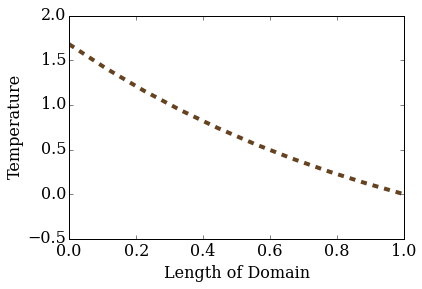

In [643]:
XX = numpy.linspace(0, 1, N)
Max_tempVGM=max(U0)

pyplot.plot(XX,U0, color = '#654322', ls = '--', lw =4)
pyplot.xlabel('Length of Domain')
pyplot.ylabel('Temperature')
pyplot.ylim(-.5, 2)
pyplot.xlim(0, 1.0)

print('This is our VGM temperature profile after:', nt*dt, 'seconds')
print('The temperature at our LHS boundary is:', Max_tempVGM, 'degrees')
print('Final position of our interface is:', s[m])
print('The speed of our interface is:', sdot)
print('Our grid spaceing (dx) after', nt*dt, 'seconds is:', dx[m] )

Hey now! That looks pretty good! Let's compare this result to our earlier Analytical (exact) solution to the 1D Dimensionless problem, for 1 second into the diffusion:

Max error (@x=0) is: 1.93619004241 Percent


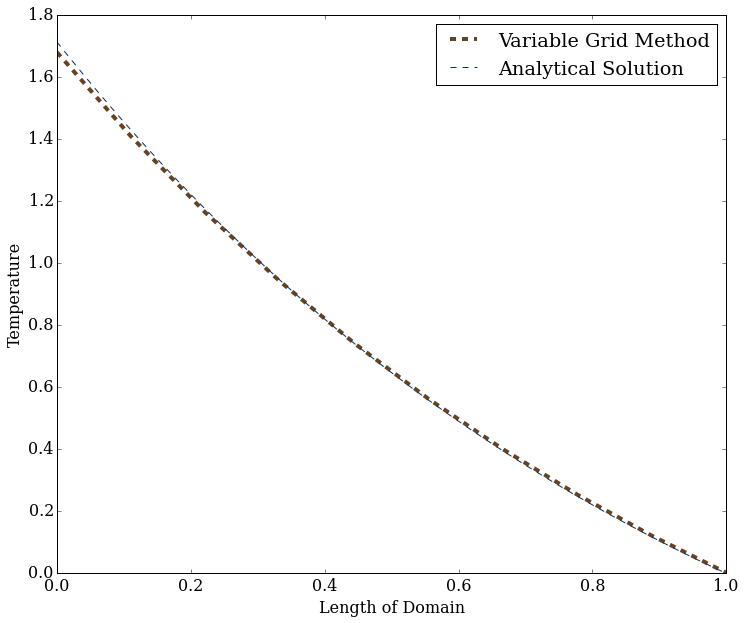

In [644]:
pyplot.figure(figsize=(12,10))
pyplot.plot(XX,U0, color = '#654322', ls = '--',  lw =4, label = 'Variable Grid Method')
pyplot.plot(x, ExactS, color = '#003366', ls = '--', lw =1, label='Analytical Solution')
pyplot.xlabel('Length of Domain')
pyplot.ylabel('Temperature')
pyplot.ylim(0, 1.8)
pyplot.xlim(0, 1.0)
pyplot.legend();

print('Max error (@x=0) is:',abs(Max_tempVGM-Max_tempA)*(100/Max_tempA),'Percent')

Under 2% error is pretty good! What else should we verify? How about the change in the interface location s(t) and the size of our spatial grid (dx) over time?

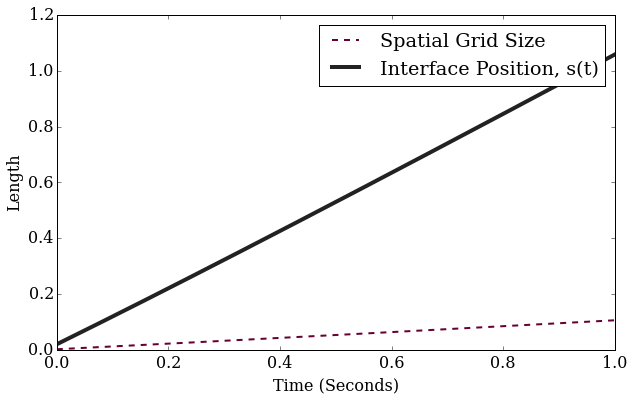

In [645]:
Time=numpy.linspace(0,dt*nt,nt)
pyplot.figure(figsize=(10,6))

pyplot.plot(Time,dx, color = '#660033', ls = '--', lw =2, label='Spatial Grid Size')
pyplot.plot(Time,s,color = '#222222', ls = '-', lw =4, label='Interface Position, s(t)')
pyplot.xlabel('Time (Seconds)')
pyplot.ylabel('Length')
pyplot.legend();

and so we see that both the spatial grid size, dx, and the interface location, s(t), increase with time over the course of 1 second. This is exactly what we would expect! Infact, remember back to our anayltical solution, we solved the interface function  to be: $s(t)=t$, which is exactly the graph that our numerical solution has given us! 

Well, then! That's a wrap! Looks like everything is all accounted for, right?. . . . . . . . . . . .  . .well, not exactly. There are still quite a few questions left unanswered, and now we must discuss the limitations in the Variable Grid Method of numerical implementation.

### Limitations of the Variable Grid Method

A number of questions should be coming to mind, among those are:

1) Why do we only analyze for 1 second of diffusion? 

2) Why is your VGM timestep (dt) so small at 2.0e-6?

3) Why is your number of spatial grid points (N) only 10? 


These are all VERY good questions, do you already know the answer? Here is a hint: it all has to do with stability!

You see, we have a relatively benign stability statement: $\Delta t \leq (\Delta x^{m})^{2}$, but still, it is a crutial aspect of our numerical analysis. This statement limits the size of our timestep, dt, and is the key reason why we chose our initial, constant, dt to be 2.0e-6 (lets not also forget the fact that this dt and N were also chosen by Caldwell and Savovic [5]) . Remember, because we are using a Central Difference scheme, our stability criteria essentially comes from the CFL condition: 

$$\frac{\Delta t}{(\Delta x^{m})^{2}} \leq \sigma = 1$$. 

Remember, the parameters dt and dx are not just arbitrarilty chosen. They determine the speed of your numerical solution. At all times you need the speed of which your solution progresses to be faster than the speed of which the problem (in this case, thermal diffusion) propogates. Afterall, how can you calculate the solution numerically when the solution is faster than the numerical analysis?!


Here is a pertinent question for you: Which do you determine first: dt, nt, N, or L? Does it matter which one you chose first?
The answer is normally, yes, we chose N and L which gives us dx, we then use a stability statement with dx (and $\alpha$) to limit dt, we then choose our nt to determine the elapsed time into our solution in the form of (nt*dt) seconds, easy right?

Well this is where we get to limitation #1 with the Variable Grid Method: 

Because the end of our domain "L" is in actuality the position of our interface, s(t), and our interface at time t=0 is approximately at the origin (x=0.02), then if we want a constant number of spatial grids N (say N=10), our initial dx is extremely small!. Remember governing equation (F) says: $\Delta x^{m+1} = \frac{s_{m+1}}{N}$, well at t=0 (m=0) s[0] is 0.02, meaning our initial dx, dx[0] is: 0.002. Plug this back into our stability statement and you see that dt must be smaller than or equal to 4e-6! That is VERY harsh criterion for a timestep dt. In essence, with SUCH a small time step, we would need hundreds of thousands of time loops, nt, in order to get just 1 second of data. Now you see why nt is chosen to be 500,000 in order to get just 1 second of data. If I had wanted more time elapsed, we would have needed iterations in the millions. (This is also why the analytical solution was calculated only for 1 second, we wanted to be able to compare results at the end!)

This is limitation #2 of the Variable Grid Method: Because the interface starts at the origin, the initial spatial step is very small, and forces a very very small timestep, dt. Thus a very very large number of iterations is needed to get into the "Seconds" scale for simulations, this is a slow numerical process... 

Not only this, but we have limitation #3 of the Variable Grid Method: If we want a longer dimensional domain, we need to choose a larger N. This will give us a final domain of $L=N*dx_{final}$, but if N is larger, then going back to our governing equation (F),  $\Delta x^{m+1} = \frac{s_{m+1}}{N}$ this means that dx[0] is even smaller, which continues to force a much smaller dt. Thus for the Variable Grid Method, if you want a large domain, you need an even smaller timestep, which forces more time in your numerical calculation.



Let's test this out for ourselves, lets redo the VGM calculations but increase N to say, 14:
(The cell below is in Raw-NB Convert since we didn't want it to slow you down the first time you ran this program. Notice the N is now 14, go ahead and run this below cell and see what happens)

As you can see, our stability criteria is still met, since $\Delta t \leq (\Delta x_{0})^{2}$. Infact, with a 40% larger N we see that we have less error as well! But what if we set N=15? 
(The cell below is in Raw-NB Convert since we didn't want it to slow you down the first time you ran this program. Notice the N is now 15, go ahead and run this below cell and see what happens THIS time)

Wow! That blew up! Just as we expect it would now that with N=15 our time step is larger than our initial spatial step! 

#### Final Thoughts

And now we know, that the Stefan Problem, a boundary value PDE with  a time-dependant moving boundary, CAN be solved. We have just demonstrated the solution for a 1D, Dimensionless Stefan Problem with specifically chosen (time-dependant) input heat flux in order to give us a simplified exact solution to compare with. You have also seen implementation of the Variable Grid Method, one of many ways inwhich one can numerical simulate the Stefan problem. But we have also seen the limitations, namely in small time-steps ($dt$), smaller numerical domain ($N\cdot dx_{f}$), and large number of iterations ($nt$) for just a small amount of analytical time (t=$nt \cdot dt$ seconds). Perhaps when it comes time for you to model the melting of the Polar Ice caps, you'll choose a more "expedient" method? Just make sure you get the answer BEFORE the caps melt...)

EXERCISE #1: Can you implement the Variable Grid Method discretization governing equations to give us a solution faser? Can it handle millions of time iterations without putting us to sleep?

EXERCISE #2: Can you write a stability condition statement that will maximize our time-step (dt) for a given N and still keep it constant?

# References

1. Kutluay S., The numerical solution of one-phase classical Stefan problem, Journal of Computational and Applied Mathematics 81 (1997) 135-144

2. Javierre, E., A Comparison of Numeical Models for one-dimensional Stefan problems, Journal of Compuational and Applied Mathematics 192 (2006) 445-459

3. Vuik, C., "Some historical notes about the Stefan problem". Nieuw Archief voor Wiskunde, 4e serie 11 (2): 157-167 (1993)

4. Crowley, A. B., Numerical Solution of Stefan Problems, Brunel University, Department of Mathematics, TR/69 December 1976

5. Caldwell, J., Numerical Solution of Stefan Problem By Variable Space Grid Method and Boundary Immodbilisation Method, Jour. of Mathematical Sciences, Vol. 13 No.1 (2002) 67-79.

In [646]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file ='numericalmoocstyle.css'
HTML(open(css_file, "r").read())